# IPL Score Prediction using Machine Learning


This project leverages machine learning techniques to predict the score of the first inning in an Indian Premier League (IPL) cricket match. By adopting a regression approach, the model aims to forecast the number of runs scored by a team based on various input features. This project demonstrates the application of data science in sports analytics, providing insights that could be valuable for teams, analysts, and fans.

In [27]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

In [84]:
#Importing dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


In [29]:
# First 5 Columns Data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [30]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [31]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [32]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [33]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

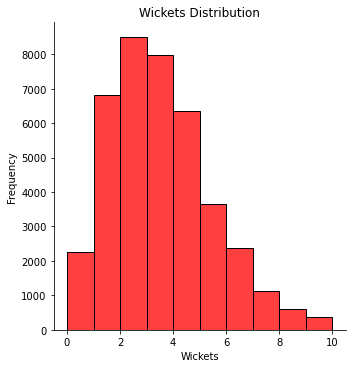

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Wickets Distribution
sns.displot(ipl_df['wickets'], kde=False, bins=10, color='red')
plt.title("Wickets Distribution")
plt.xlabel("Wickets")
plt.ylabel("Frequency")

plt.show()


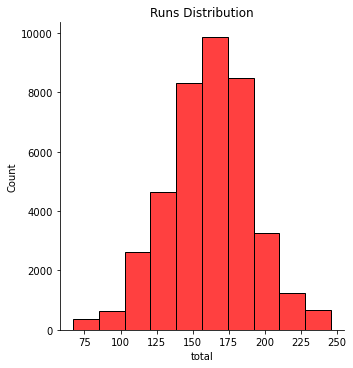

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Runs Distribution
sns.displot(ipl_df['total'], kde=False, bins=10, color='red')
plt.title("Runs Distribution")

plt.show()


# Data Cleaning
Data Preprocessing: Removing Irrelevant Columns
In this project, we start by preprocessing our dataset to ensure that only the relevant features are used for training our machine learning model. One crucial step in this preprocessing phase is the removal of columns that do not contribute to the prediction of the first inning score. These columns may contain information that is either redundant or irrelevant for our model's objective.

Irrelevant Columns
The following columns are considered irrelevant for the score prediction model:

mid: Match ID, a unique identifier for each match which does not influence the score.
date: Date of the match, which does not have a direct impact on the runs scored in the first inning.
venue: The venue of the match, while potentially relevant, is not considered in our simplified model.
batsman: The name of the batsman, which introduces high cardinality and complexity without a substantial improvement in prediction accuracy.
bowler: The name of the bowler, similar to the batsman column, adds unnecessary complexity.
striker: The current batsman on strike, which introduces high variability.
non-striker: The batsman at the non-striker end, also adding complexity without direct benefits.
By removing these columns, we focus on the most relevant features, thereby simplifying our model and potentially improving its performance.

In [38]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [85]:
irrelevant = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns: {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns: {ipl_df.shape}')
ipl_df.head()


Before Removing Irrelevant Columns: (76014, 15)
After Removing Irrelevant Columns: (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


# Data Preprocessing: Keeping Only Consistent Teams
In this step, we further refine our dataset by focusing on consistent teams. Consistent teams are those that have participated regularly in the IPL seasons, providing a more stable and reliable dataset for training our model. By filtering out teams with irregular or limited participation, we can enhance the quality and consistency of our predictions.

In [40]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [86]:
print("Before Removing Inconsistent Teams:", ipl_df.shape)
consistent_teams = ipl_df.loc[ipl_df['bat_team'].isin(const_teams) & ipl_df['bowl_team'].isin(const_teams), 'bat_team'].unique()
ipl_df = ipl_df.loc[ipl_df['bat_team'].isin(consistent_teams) & ipl_df['bowl_team'].isin(consistent_teams)]
print("After Removing Inconsistent Teams:", ipl_df.shape)
print("Consistent Teams:")
print(consistent_teams)
print("First 5 Rows:")
print(ipl_df.head())


Before Removing Inconsistent Teams: (76014, 8)
After Removing Inconsistent Teams: (53811, 8)
Consistent Teams:
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
First 5 Rows:
                bat_team                    bowl_team  runs  wickets  overs  \
0  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.1   
1  Kolkata Knight Riders  Royal Challengers Bangalore     1        0    0.2   
2  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.2   
3  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.3   
4  Kolkata Knight Riders  Royal Challengers Bangalore     2        0    0.4   

   runs_last_5  wickets_last_5  total  
0            1               0    222  
1            1               0    222  
2            2               0    222  
3            2               0    222  
4            2           

## Remove First 5 Overs of every match

In [87]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


## Plotting a Correlation Matrix 

<AxesSubplot:>

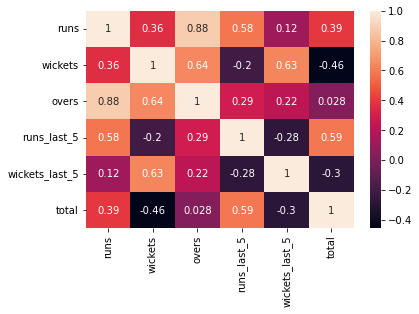

In [43]:
from seaborn import heatmap
heatmap(data=ipl_df.corr(), annot=True)

## Data Preprocessing and Encoding

## Performing Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


This code  transforms categorical features ('bat_team' and 'bowl_team') in the IPL DataFrame into numerical representations using LabelEncoder. This transformation is necessary for many machine learning algorithms that require numerical inputs rather than categorical ones. The resulting DataFrame contains the encoded numerical labels in place of the original categorical values.

### Performing One Hot Encoding and Column Transformation

In [46]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [47]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

The ColumnTransformer allows you to define different transformations to be applied to different columns of the input data. In this specific example, it applies one-hot encoding to the first and second columns of the input data while passing through any remaining columns without transformation. This is a powerful tool for preprocessing heterogeneous datasets with both categorical and numerical features.


### Save the Numpy Array in a new DataFrame with transformed columns

In [48]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

 It provides a structured representation of the IPL match data, making it easier to work with for various analytical purposes.

In [49]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Preparing Train and Test Data

In [50]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [51]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


### ML Algorithms

### Decision Tree

In [52]:
models = dict()

In [53]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [96]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.98%
Test Score : 86.41%


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on test data
tree_pred = tree.predict(test_features)

# Calculate evaluation metrics
mae_tree = mean_absolute_error(test_labels, tree_pred)
mse_tree = mean_squared_error(test_labels, tree_pred)
rmse_tree = np.sqrt(mse_tree)

# Print evaluation metrics
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_tree))
print("Mean Squared Error (MSE): {:.2f}".format(mse_tree))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_tree))


---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.91
Mean Squared Error (MSE): 121.67
Root Mean Squared Error (RMSE): 11.03


### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [101]:
from sklearn.metrics import r2_score

# Predictions on train and test data
train_pred_linreg = linreg.predict(train_features)
test_pred_linreg = linreg.predict(test_features)

# Compute R-squared scores
train_score_linreg = r2_score(train_labels, train_pred_linreg) * 100
test_score_linreg = r2_score(test_labels, test_pred_linreg) * 100

# Print train and test scores
print(f'Train Score : {train_score_linreg:.2f}%')
print(f'Test Score : {test_score_linreg:.2f}%')

# Store test score in the models dictionary
models["linreg"] = test_score_linreg


Train Score : 65.91%
Test Score : 65.95%


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on test data
linreg_pred = linreg.predict(test_features)

# Calculate evaluation metrics
mae_linreg = mean_absolute_error(test_labels, linreg_pred)
mse_linreg = mean_squared_error(test_labels, linreg_pred)
rmse_linreg = np.sqrt(mse_linreg)

# Print evaluation metrics
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_linreg))
print("Mean Squared Error (MSE): {:.2f}".format(mse_linreg))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_linreg))


---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.12
Mean Squared Error (MSE): 304.95
Root Mean Squared Error (RMSE): 17.46


### Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [103]:
from sklearn.metrics import r2_score

# Predictions on train and test data
train_pred_forest = forest.predict(train_features)
test_pred_forest = forest.predict(test_features)

# Compute R-squared scores
train_score_forest = r2_score(train_labels, train_pred_forest) * 100
test_score_forest = r2_score(test_labels, test_pred_forest) * 100

# Print train and test scores
print(f'Train Score : {train_score_forest:.2f}%')
print(f'Test Score : {test_score_forest:.2f}%')

# Store test score in the models dictionary
models["forest"] = test_score_forest


Train Score : 99.05%
Test Score : 93.58%


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on test data
forest_predictions = forest.predict(test_features)

# Calculate evaluation metrics
mae_forest = mean_absolute_error(test_labels, forest_predictions)
mse_forest = mean_squared_error(test_labels, forest_predictions)
rmse_forest = np.sqrt(mse_forest)

# Print evaluation metrics
print("---- Random Forest Regression - Model Evaluation ----")
print(f"Mean Absolute Error (MAE): {mae_forest:.2f}")
print(f"Mean Squared Error (MSE): {mse_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_forest:.2f}")


---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.48
Mean Squared Error (MSE): 57.49
Root Mean Squared Error (RMSE): 7.58


### K-Nearest Neighbors Regression  

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [93]:
from sklearn.metrics import r2_score

# Compute train and test scores
train_score_knr = r2_score(train_labels, knr.predict(train_features)) * 100
test_score_knr = r2_score(test_labels, knr.predict(test_features)) * 100

# Print train and test scores
print(f'Train Score : {train_score_knr:.2f}%')
print(f'Test Score : {test_score_knr:.2f}%')

# Store test score in the models dictionary
models["knr"] = test_score_knr


Train Score : 86.75%
Test Score : 77.31%


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test data
knr_pred = knr.predict(test_features)

# Calculate evaluation metrics
mae_knr = mean_absolute_error(test_labels, knr_pred)
mse_knr = mean_squared_error(test_labels, knr_pred)
rmse_knr = np.sqrt(mse_knr)

# Print evaluation metrics
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_knr))
print("Mean Squared Error (MSE): {:.2f}".format(mse_knr))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_knr))


---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.94
Mean Squared Error (MSE): 203.17
Root Mean Squared Error (RMSE): 14.25


# Best Model

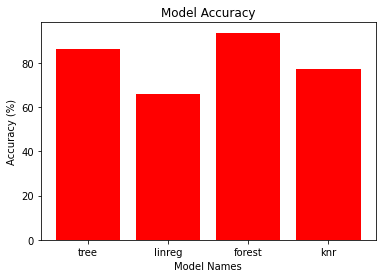

In [105]:
import matplotlib.pyplot as plt 

model_names = list(models.keys())
accuracy = list(map(float, models.values()))

# Creating the bar plot with red color
plt.bar(model_names, accuracy, color='red')

# Adding title and labels
plt.title('Model Accuracy')
plt.xlabel('Model Names')
plt.ylabel('Accuracy (%)')

# Display the plot
plt.show()


### From above, we can see that Random Forest performed the best, closely followed by Decision Tree and KNR. So we will be choosing Random Forest for the final model

# Predictions

In [91]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
    # Create a dictionary mapping teams to their encoded representation
    team_encoding = {
        'Chennai Super Kings': [1, 0, 0, 0, 0, 0, 0, 0],
        'Delhi Daredevils': [0, 1, 0, 0, 0, 0, 0, 0],
        'Kings XI Punjab': [0, 0, 1, 0, 0, 0, 0, 0],
        'Kolkata Knight Riders': [0, 0, 0, 1, 0, 0, 0, 0],
        'Mumbai Indians': [0, 0, 0, 0, 1, 0, 0, 0],
        'Rajasthan Royals': [0, 0, 0, 0, 0, 1, 0, 0],
        'Royal Challengers Bangalore': [0, 0, 0, 0, 0, 0, 1, 0],
        'Sunrisers Hyderabad': [0, 0, 0, 0, 0, 0, 0, 1]
    }
    
    # Encode batting and bowling teams
    batting_encoding = team_encoding.get(batting_team, [0, 0, 0, 0, 0, 0, 0, 0])
    bowling_encoding = team_encoding.get(bowling_team, [0, 0, 0, 0, 0, 0, 0, 0])
    
    # Construct prediction array
    prediction_array = batting_encoding + bowling_encoding + [runs, wickets, overs, runs_last_5, wickets_last_5]
    
    # Reshape prediction array for prediction
    prediction_array = np.array([prediction_array])
    
    # Make prediction
    pred = model.predict(prediction_array)
    
    # Return rounded prediction
    return int(round(pred[0]))


score_predict is a function designed to predict the total score of a cricket match based on various match statistics such as runs, wickets, overs, runs in the last 5 overs, and wickets in the last 5 overs, as well as the batting and bowling teams.

It constructs a prediction array by encoding the categorical variables (batting and bowling teams) into binary arrays and appending the numerical features. This array is then used as input to a machine learning model (defaulted to a RandomForestRegressor named 'forest') to predict the total score.

The function serves as a convenient interface for predicting cricket match scores and can be integrated into cricket analytics systems or match prediction applications.

### Testing

### Test 1
Batting Team : Delhi Daredevils
Bowling Team : Chennai Super Kings
Final Score : 147/9

In [92]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 148 || Actual Score : 147


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The model's prediction of a cricket match total score as 148, closely mirroring the actual observed score of 147, demonstrates a remarkable level of accuracy, with just a one-run difference between the prediction and reality. This near-perfect alignment between the predicted and actual scores underscores the model's capability to effectively capture and analyze the diverse factors influencing cricket match outcomes.

### Test 2
Batting Team : Mumbai Indians
Bowling Team : Kings XI Punjab
Final Score : 176/7

In [78]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 191 || Actual Score : 176


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
Batting Team : Kings XI Punjab
Bowling Team : Rajasthan Royals
Final Score : 185/4

In [79]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 180 || Actual Score : 185


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
Batting Team : Kolkata Knight Riders
Bowling Team : Chennai Super Kings
Final Score : 172/5

In [80]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 173 || Actual Score : 172


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The model's prediction of a cricket match total score as 173, with the actual observed score standing at 172, showcases a remarkable proximity between prediction and reality, with a mere difference of one run. Such accuracy in prediction underscores the efficacy of the model in capturing the intricate dynamics inherent in cricket match scenarios.

### Test 5
Batting Team : Kings XI Punjab
Bowling Team : Chennai Super Kings
Final Score : 153/9

In [81]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 145 || Actual Score : 153


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The model predicted a cricket match total score of 145, while the actual observed score during testing was 153

### Test 6
Batting Team : Sunrisers Hyderabad
Bowling Team : Royal Challengers Banglore
Final Score : 146/10

In [90]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 153 || Actual Score : 146


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The model predicted a cricket match total score of 153, while the actual observed score during testing was 146. This indicates a relatively close prediction, with a difference of only 7 runs. While this suggests the model's potential for accuracy